# Clase 1 - Red Neuronal con Numpy
<br/>

## Curso de Especialización en Inteligencia Artificial
## Analisis profundo

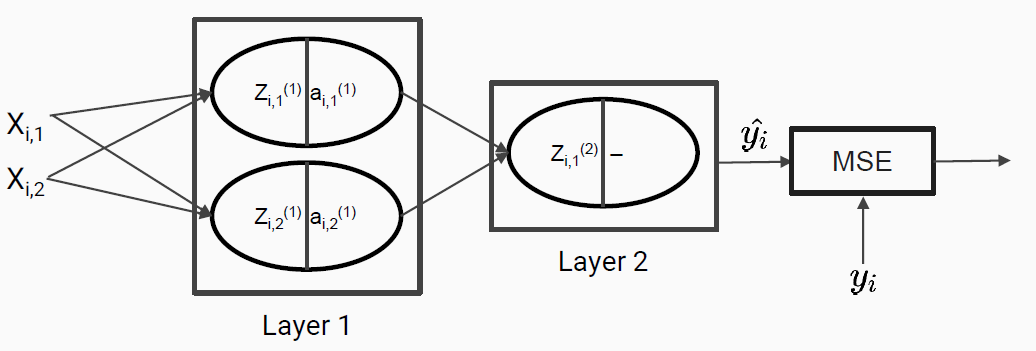

In [13]:
import os, random
import numpy as np
from matplotlib import pyplot as plt

# Set the project root directory as the current working directory
project_root = os.path.abspath(os.path.join('..', '..'))
os.chdir(project_root)

# Import my own modules
from src.nn import MLP

In [14]:
# Dataset - XOR
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0])

# Build the model
mlp = MLP(nin=2, nouts=[2,1])
# Set parameters
loss = 'mseLoss'
epochs = 5000

In [21]:
# Case A: GD - lr = [1e-3, 1e-1]
lr_list = np.logspace(-3, -1, 5)
losses_gd = []
for lr in lr_list:
    mlp.reset()
    sol = mlp.fit(X, y, loss=loss, optimizer='gd', epochs=epochs, lr=lr)
    losses_gd.append(np.transpose(np.array(sol)))
    # Print final prediction
    y_pred = np.array([s.value for s in mlp.predict(X)])
    print(f'GD - lr ={lr:.1e} - y_pred ={y_pred}')

GD - lr =1.0e-03 - y_pred =[0.56375069 0.43981287 0.56552349 0.44147925]
GD - lr =3.2e-03 - y_pred =[0.403221   0.51298205 0.51774398 0.57629991]
GD - lr =1.0e-02 - y_pred =[0.48583203 0.49497001 0.50520702 0.51388779]
GD - lr =3.2e-02 - y_pred =[0.48984543 0.5414205  0.463789   0.50131501]
GD - lr =1.0e-01 - y_pred =[3.37292637e-08 9.99999985e-01 9.99999960e-01 1.53992740e-08]


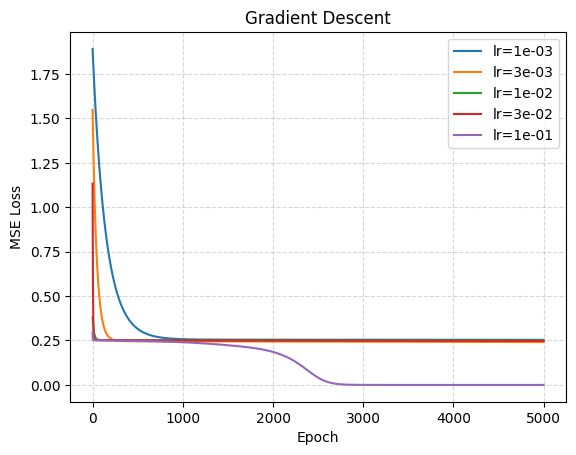

In [22]:
# Plot the loss curves for different learning rates
plt.figure()
for i, lr in enumerate(lr_list):
    plt.plot(losses_gd[i][0], losses_gd[i][1], label=f'lr={lr:.0e}')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend(loc='best')
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.title('Gradient Descent')
plt.show()

In [23]:
# Case A: SGD - lr = [1e-3, 1e-1]
lr_list = np.logspace(-3, -1, 3)
losses_sgd = []
for lr in lr_list:
    mlp.reset()
    sol = mlp.fit(X, y, loss=loss, optimizer='sgd', epochs=epochs, lr=lr)
    losses_sgd.append(np.transpose(np.array(sol)))
    # Print final prediction
    y_pred = np.array([s.value for s in mlp.predict(X)])
    print(f'SGD - lr ={lr:.1e} - y_pred ={y_pred}')

SGD - lr =1.0e-03 - y_pred =[0.49340528 0.55927736 0.42231287 0.49491954]
SGD - lr =1.0e-02 - y_pred =[0.42633581 0.50618211 0.37298848 0.42986959]
SGD - lr =1.0e-01 - y_pred =[2.91600077e-13 1.00000000e+00 1.00000000e+00 7.84372567e-14]


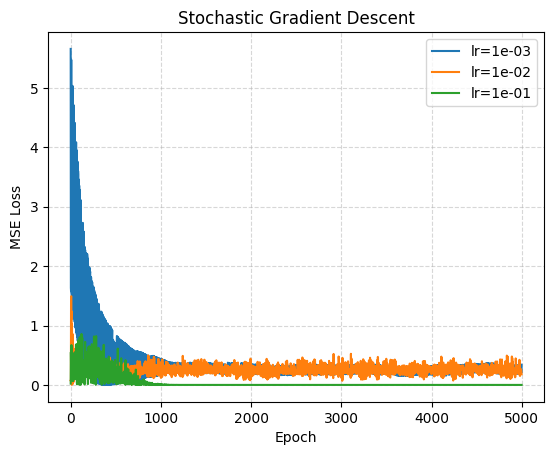

In [24]:
# Plot the loss curves for different learning rates
plt.figure()
for i, lr in enumerate(lr_list):
    plt.plot(losses_sgd[i][0], losses_sgd[i][1], label=f'lr={lr:.0e}')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend(loc='best')
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.title('Stochastic Gradient Descent')
plt.show()